In [1]:
import pandas as pd
import numpy as np

url1 =r'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\out\combined_csv.csv'
url2 =r'D:\Google Drive\Deep_Learning\Jupiter_Notebooks\ds\Laborales\G2\raw_60min_comparision_2_new.csv'

dsA = pd.read_csv(url1)
dsB = pd.read_csv(url2)


In [3]:
import socket

ip = socket.gethostbyname('http://melectronica.ddns.net')
ip

gaierror: [Errno 11001] getaddrinfo failed

In [2]:
print(dsA.columns)
print(dsB.columns)

Index(['ALPHA1', 'BrdTemp[C]', 'Cd', 'Comm_Var_out', 'DP[Bar]', 'E', 'Epsilon',
       'ErrLMQGuess', 'ErrQt', 'Frg_dp_out', 'GVF[%]', 'Gamma_Dens[kg/m3]',
       'GasDen[kg/m3]', 'GasVisc[cP]', 'Iteration_Var', 'Kappa',
       'LiqDen[kg/m3]', 'LiqVisc[cP]', 'MVT_Var_out', 'PI_Status_Out',
       'PVTFile', 'PVT_Var', 'ParamFile', 'Pressure[Bar]', 'QgStd[m3/d]',
       'QgStd[m3/s]', 'Qg[m3/d]', 'Qg[m3/s]', 'QlStd[m3/d]', 'QlStd[m3/s]',
       'Ql[m3/d]', 'Ql[m3/s]', 'QoStd[m3/d]', 'QoStd[m3/s]', 'Qo[m3/d]',
       'Qo[m3/s]', 'Quality', 'QwStd[m3/d]', 'QwStd[m3/s]', 'Qw[m3/d]',
       'Qw[m3/s]', 'Raw_Dens', 'Rhog', 'Rhol', 'Rhoo', 'Rhow', 'Sonar_Vel_Var',
       'Tau', 'Temperature[C]', 'Time_hs', 'TotGOR', 'TotWLR[%]',
       'Velocity[m/s]', 'VgStd[m3]', 'Vg[m3]', 'VlStd[m3]', 'Vl[m3]',
       'Vm[m/s]', 'VoStd[m3]', 'Vo[m3]', 'VwStd[m3]', 'Vw[m3]', 'WWC[%]',
       'WaterCut[%]', 'Well No.', 'XLM', 'Xl', 'ch1[nA]', 'ch2[nA]', 'ch3[nA]',
       'ch4[nA]', 'ch5[nA]', 'diffPressZero

In [3]:
dsA['Time_hs'] = pd.to_datetime(dsA['Time_hs'])
dsA['Time_hs'] = dsA['Time_hs'].dt.strftime('%Y-%m-%d %H:%M:%S')
dsA = dsA.sort_values('Time_hs')
dsB['Time'] = pd.to_datetime(dsB['DATE & TIME'])
dsB['Time_hs'] = dsB['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')
dsB = dsB.sort_values('Time_hs')

print(dsA['Time_hs'].head())
print(dsB['Time_hs'].head())

350    2020-06-07 21:00:00
351    2020-06-07 22:00:00
352    2020-06-07 23:00:00
353    2020-06-08 00:00:00
354    2020-06-08 01:00:00
Name: Time_hs, dtype: object
0    2020-06-08 19:00:00
1    2020-06-08 20:00:00
2    2020-06-08 21:00:00
3    2020-06-08 22:00:00
4    2020-06-08 23:00:00
Name: Time_hs, dtype: object


In [4]:
ds = pd.merge(dsA, dsB, on='Time_hs')
ds.sort_values(by='Time_hs')
ds.drop_duplicates(subset ='Time_hs',keep='first',inplace=True) 

ds['Time_hs'].head(25)

0     2020-06-08 19:00:00
1     2020-06-08 20:00:00
2     2020-06-08 21:00:00
4     2020-06-08 22:00:00
5     2020-06-08 23:00:00
6     2020-06-09 00:00:00
7     2020-06-09 01:00:00
8     2020-06-09 02:00:00
9     2020-06-09 03:00:00
10    2020-06-09 04:00:00
11    2020-06-09 05:00:00
12    2020-06-09 06:00:00
13    2020-06-09 07:00:00
14    2020-06-09 08:00:00
15    2020-06-09 09:00:00
16    2020-06-09 10:00:00
17    2020-06-09 11:00:00
18    2020-06-09 12:00:00
19    2020-06-09 13:00:00
20    2020-06-09 14:00:00
21    2020-06-09 15:00:00
22    2020-06-09 16:00:00
23    2020-06-09 17:00:00
24    2020-06-09 18:00:00
25    2020-06-09 19:00:00
Name: Time_hs, dtype: object

In [5]:
mask = (ds['Time_hs'] > '2020-06-8 06:00:00') & (ds['Time_hs'] <= '2020-08-12 18:00:00')

ds1 = ds.loc[mask]


In [6]:
ds1[['GVF[%]','QgStd[m3/d]','FSF Gas Rate [sm3/d]','Velocity[m/s]', 'Sonar_Vel_Var']].describe()

,GVF[%],QgStd[m3/d],FSF Gas Rate [sm3/d],Velocity[m/s],Sonar_Vel_Var
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,80.817520,183265.943381,194600.315175,10.682153,0.026819
std,12.206710,47737.404157,56022.793763,2.844893,0.164785
min,0.000000,0.000000,0.000000,1.825587,0.000000
25%,80.801044,162152.030437,169216.162350,9.301936,0.000000
50%,82.619634,168773.579685,175096.459250,9.641575,0.000000
75%,84.387179,232392.026762,248738.424725,13.689747,0.000000
max,92.530723,385367.257219,443725.660000,23.191265,1.333996


In [7]:
# Import necessary packages
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Use white grid plot background from seaborn
sns.set(font_scale=1.5, style="whitegrid")

import matplotlib.pyplot as plt

fig, ax = plt.subplots(3,figsize=(22,8),sharex=True)
ds1.plot(y='GVF[%]',color='red',ax=ax[0])
ds1.plot(y='QgStd[m3/d]',color='orange',ax=ax[1])
ds1.plot(y='SEP Gas Rate [sm3/d]',color='blue',ax=ax[2])
#ax[0].set(title="Gas Flow Rate")
#ax[1].set(title="Liquid Flow Rate")
#ax[2].set(title="WC")
plt.show()

<Figure size 2200x800 with 3 Axes>

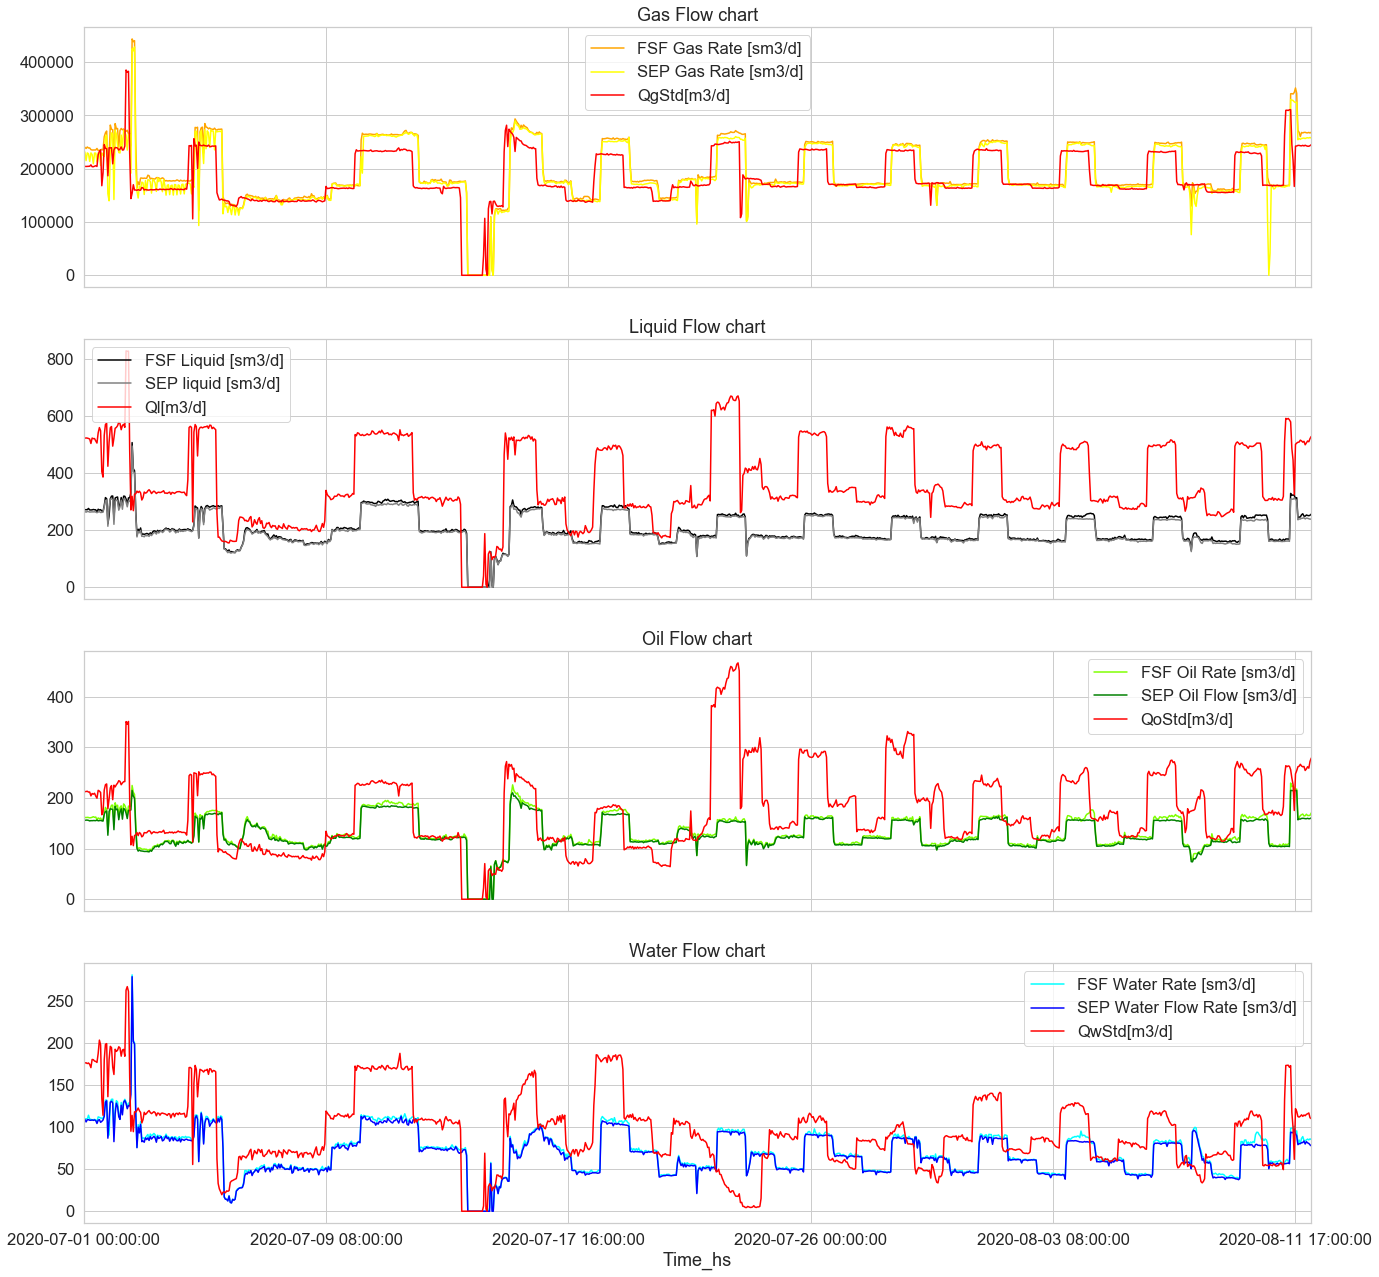

In [8]:
fig, ax = plt.subplots(4,figsize=(22,22),sharex=True)
ds1.plot(x='Time_hs', y=['FSF Gas Rate [sm3/d]','SEP Gas Rate [sm3/d]','QgStd[m3/d]'],color=['orange','yellow','red'],ax=ax[0])
ds1.plot(x='Time_hs', y=['FSF Liquid [sm3/d]','SEP liquid [sm3/d]','Ql[m3/d]'],color=['black','gray','red'],ax=ax[1])
ds1.plot(x='Time_hs', y=['FSF Oil Rate [sm3/d]','SEP Oil Flow [sm3/d]','QoStd[m3/d]'],color=['chartreuse','green','red'],ax=ax[2])
ds1.plot(x='Time_hs', y=['FSF Water Rate [sm3/d]','SEP Water Flow Rate [sm3/d]','QwStd[m3/d]'],color=['aqua','blue','red'],ax=ax[3])
ax[0].set(title="Gas Flow chart")
ax[1].set(title="Liquid Flow chart")
ax[2].set(title="Oil Flow chart")
ax[3].set(title="Water Flow chart")
plt.show()

In [9]:
ds1.loc[:,'Time_hs'] = pd.to_datetime(ds1.loc[:,'Time_hs'])
ds1.loc[:,'Day_Month'] = ds1.loc[:,'Time_hs'].dt.strftime('%Y-%m-%d')
ds2 = ds1.groupby('Day_Month').mean()
ds2.reset_index(level=0, inplace=True)
ds2.head()

C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\e196315\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


,Day_Month,ALPHA1,BrdTemp[C],Cd,Comm_Var_out,DP[Bar],E,Epsilon,ErrLMQGuess,ErrQt,...,FSF WC [%],FSF Liquid [sm3/d],SEP Gas Rate [sm3/d],SEP Gas Cumm. [sm3],SEP GOR (Gas/Oil Ratio),SEP Oil Density [g/cm3],SEP Oil Flow [sm3/d],SEP RAW Oil Flow [m3/d],SEP Water Flow Rate [sm3/d],SEP liquid [sm3/d]
0,2020-07-01,NaN,15.786268,0.930738,0.0,0.197919,0.0,0.972542,0.0,-0.973913,...,0.407470,275.195598,222740.788333,3.880991e+06,1402.409437,0.554958,158.906667,248.291667,111.097500,270.004167
1,2020-07-02,NaN,16.219816,0.945836,0.0,0.229437,0.0,0.988107,0.0,-0.989687,...,0.437080,301.696061,250782.804167,4.118495e+06,1541.753453,0.557542,161.497917,255.326350,129.814583,291.312500
2,2020-07-03,NaN,14.059693,0.955668,0.0,0.090769,0.0,0.999367,0.0,-1.000000,...,0.458102,194.260840,169789.008333,4.326836e+06,1660.657602,0.563167,102.818333,164.133513,86.196250,189.014583
3,2020-07-04,NaN,13.399448,0.924632,0.0,0.138374,0.0,0.966563,0.0,-0.967521,...,0.427553,210.472771,174724.519167,4.495072e+06,1465.018885,0.560208,118.736250,188.201133,87.426667,206.162917
4,2020-07-05,NaN,13.787412,0.954100,0.0,0.153309,0.0,0.997326,0.0,-0.998378,...,0.340444,251.257685,232205.096667,4.713253e+06,1469.120520,0.550083,155.411979,258.160722,89.278750,244.690729


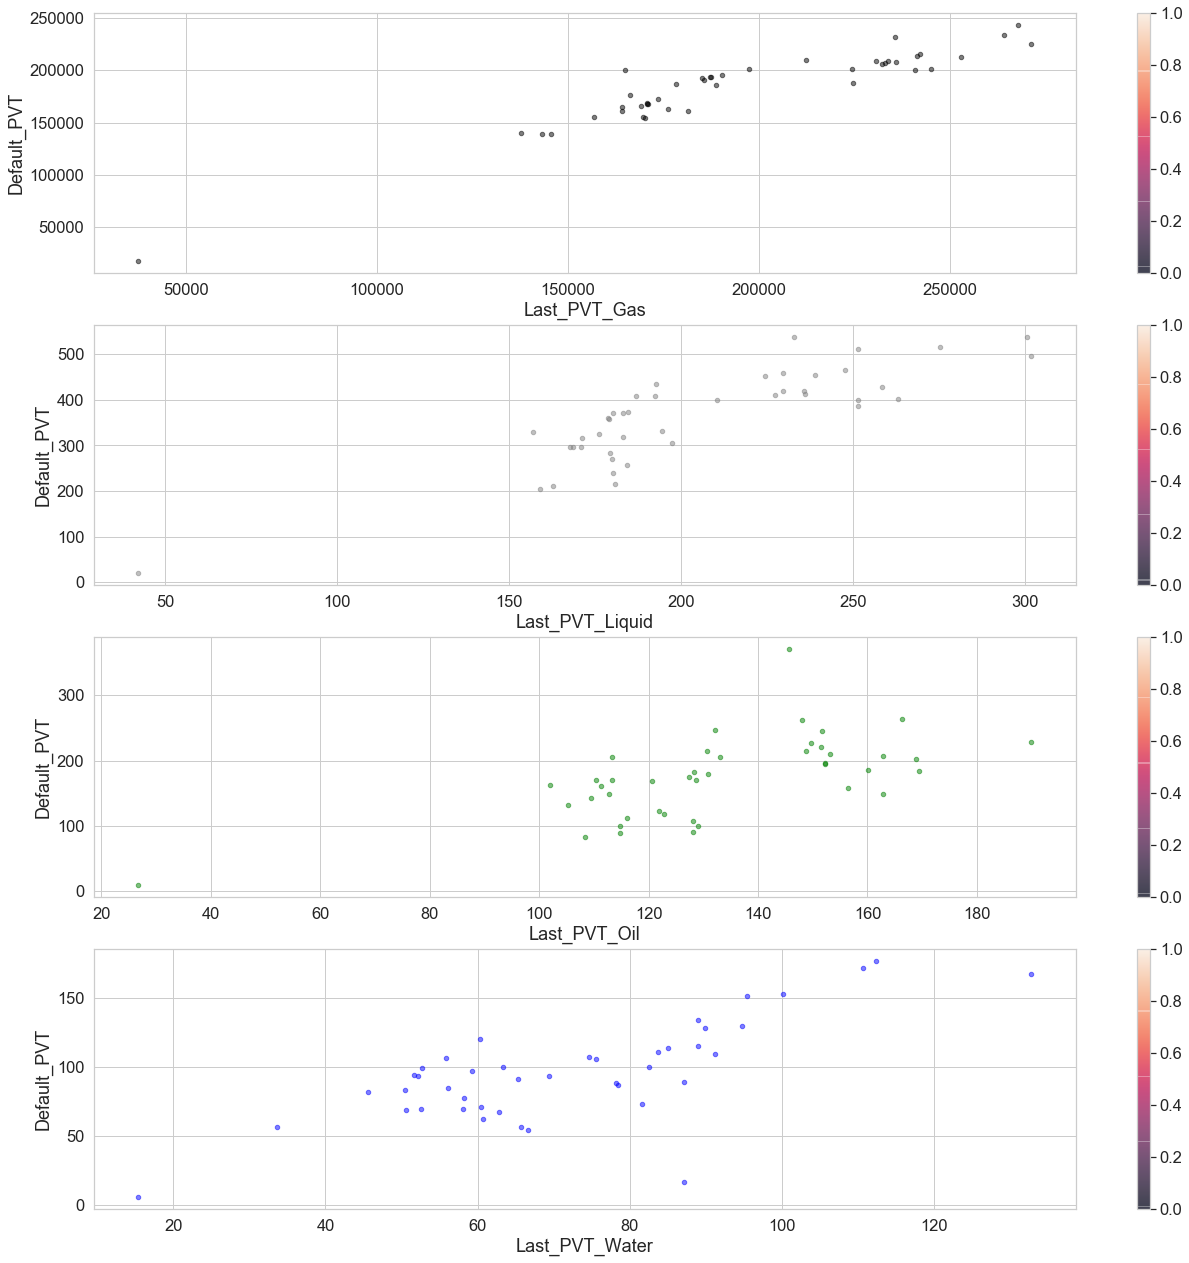

In [16]:
fig, ax = plt.subplots(4,figsize=(22,22))
ds2.plot.scatter(x='FSF Gas Rate [sm3/d]',y='QgStd[m3/d]',c='black', alpha=0.5, cmap='viridis',ax=ax[0])
ds2.plot.scatter(x='FSF Liquid [sm3/d]',y='Ql[m3/d]',c='gray', alpha=0.5, cmap='viridis',ax=ax[1])
ds2.plot.scatter(x='FSF Oil Rate [sm3/d]',y='QoStd[m3/d]',c='green', alpha=0.5, cmap='viridis',ax=ax[2])
ds2.plot.scatter(x='FSF Water Rate [sm3/d]',y='QwStd[m3/d]',c='blue', alpha=0.5, cmap='viridis',ax=ax[3])
ax[0].set_xlabel("Last_PVT_Gas")
ax[0].set_ylabel("Default_PVT")
ax[1].set_xlabel("Last_PVT_Liquid")
ax[1].set_ylabel("Default_PVT")
ax[2].set_xlabel("Last_PVT_Oil")
ax[2].set_ylabel("Default_PVT")
ax[3].set_xlabel("Last_PVT_Water")
ax[3].set_ylabel("Default_PVT")
plt.show()

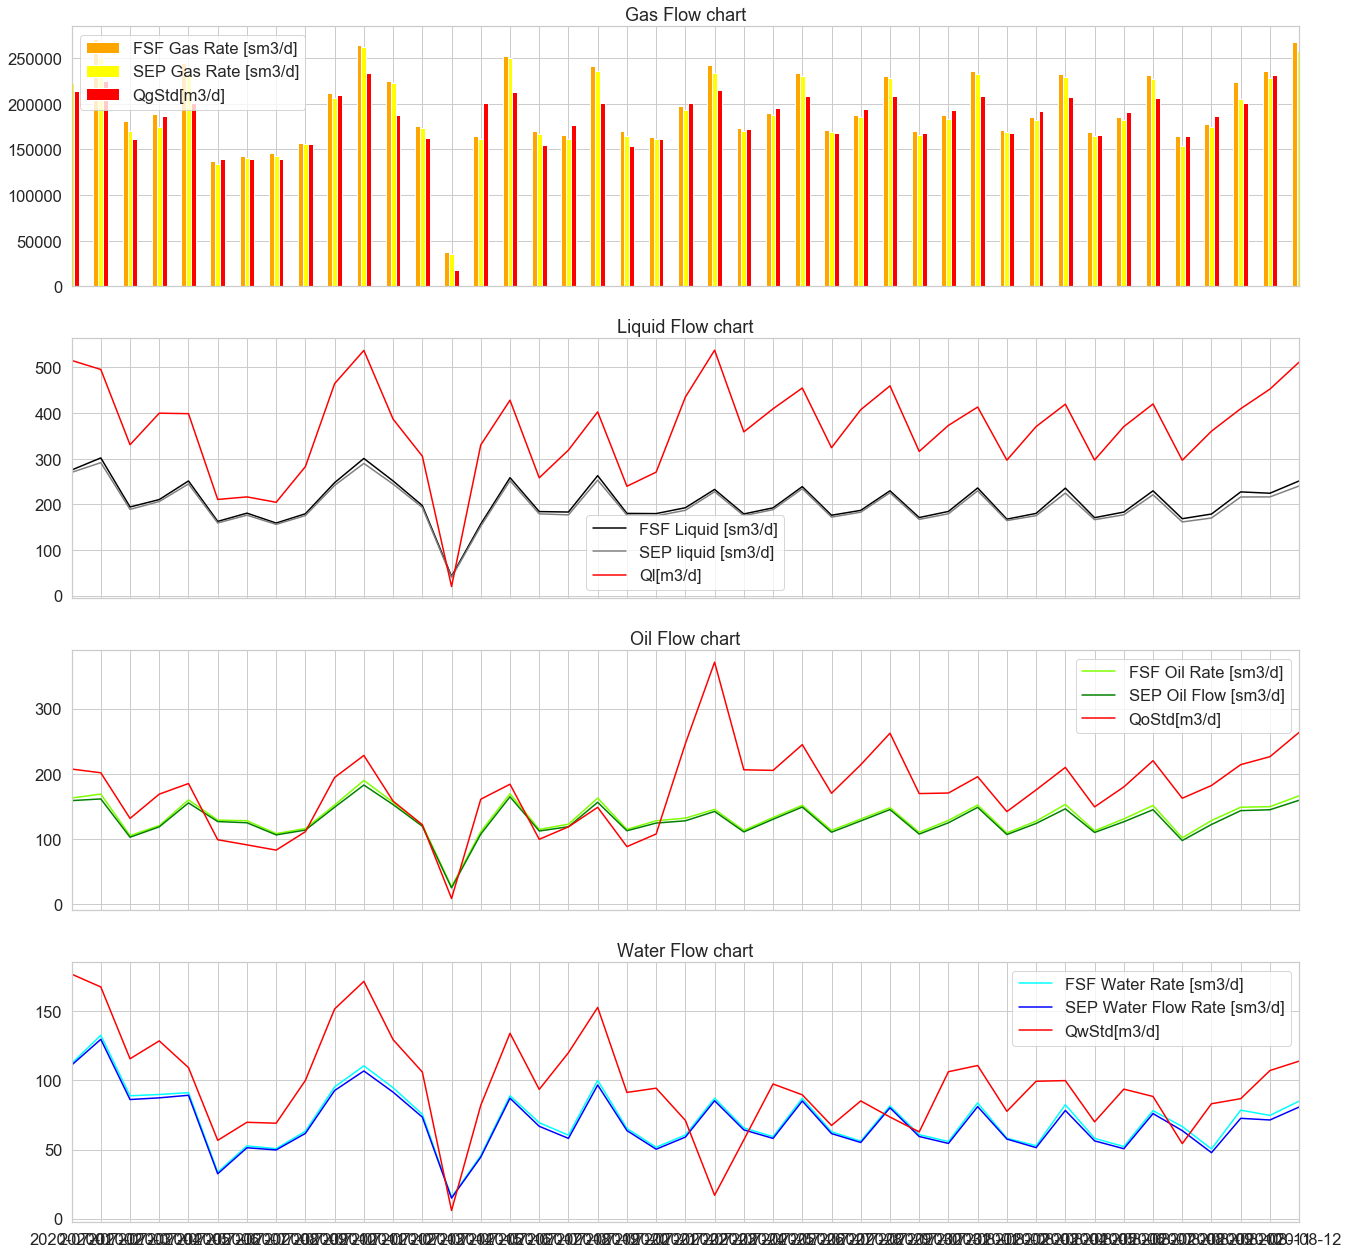

In [9]:
fig, ax = plt.subplots(4,figsize=(22,22),sharex=True)
ds2.plot.bar(x='Day_Month',y=['FSF Gas Rate [sm3/d]','SEP Gas Rate [sm3/d]','QgStd[m3/d]'],color=['orange','yellow','red'],ax=ax[0])
ds2.plot(y=['FSF Liquid [sm3/d]','SEP liquid [sm3/d]','Ql[m3/d]'],color=['black','gray','red'],ax=ax[1])
ds2.plot(y=['FSF Oil Rate [sm3/d]','SEP Oil Flow [sm3/d]','QoStd[m3/d]'],color=['chartreuse','green','red'],ax=ax[2])
ds2.plot(y=['FSF Water Rate [sm3/d]','SEP Water Flow Rate [sm3/d]','QwStd[m3/d]'],color=['aqua','blue','red'],ax=ax[3])
ax[0].set(title="Gas Flow chart")
ax[1].set(title="Liquid Flow chart")
ax[2].set(title="Oil Flow chart")
ax[3].set(title="Water Flow chart")
plt.show()

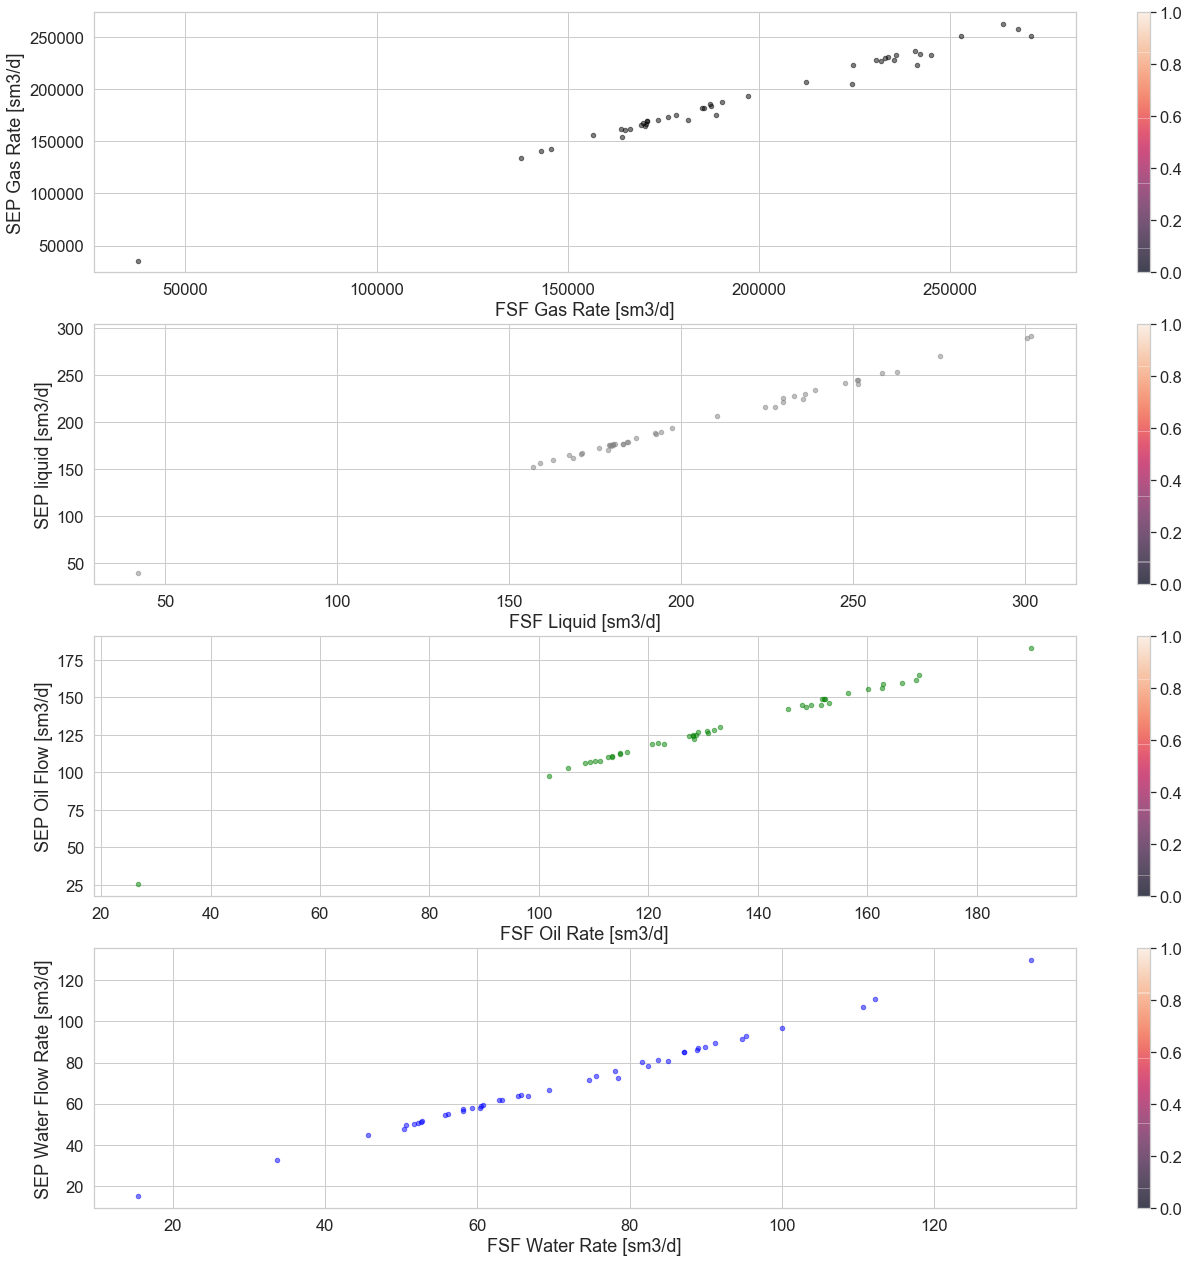

In [10]:
fig, ax = plt.subplots(4,figsize=(22,22))
ds2.plot.scatter(x='FSF Gas Rate [sm3/d]',y='SEP Gas Rate [sm3/d]',c='black', alpha=0.5, cmap='viridis',ax=ax[0])
ds2.plot.scatter(x='FSF Liquid [sm3/d]',y='SEP liquid [sm3/d]',c='gray', alpha=0.5, cmap='viridis',ax=ax[1])
ds2.plot.scatter(x='FSF Oil Rate [sm3/d]',y='SEP Oil Flow [sm3/d]',c='green', alpha=0.5, cmap='viridis',ax=ax[2])
ds2.plot.scatter(x='FSF Water Rate [sm3/d]',y='SEP Water Flow Rate [sm3/d]',c='blue', alpha=0.5, cmap='viridis',ax=ax[3])
plt.show()

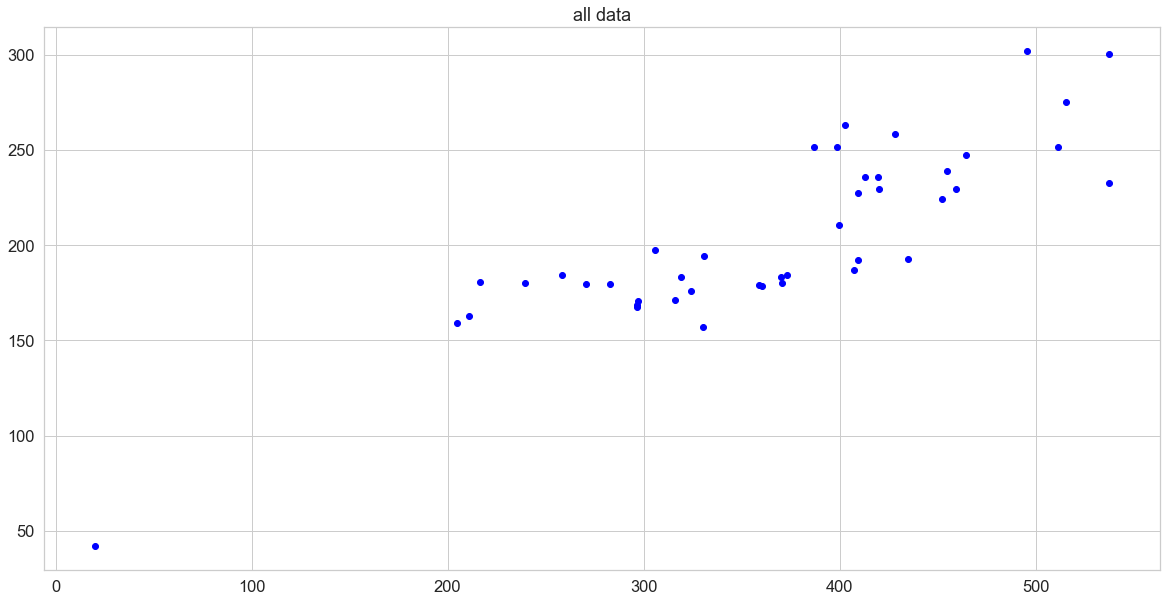

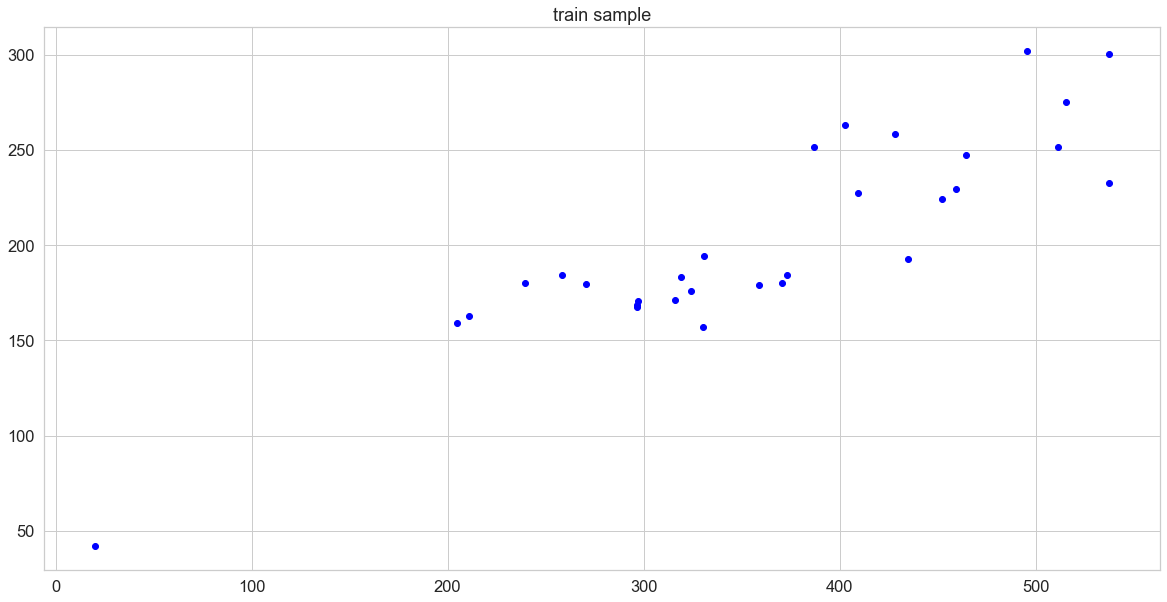

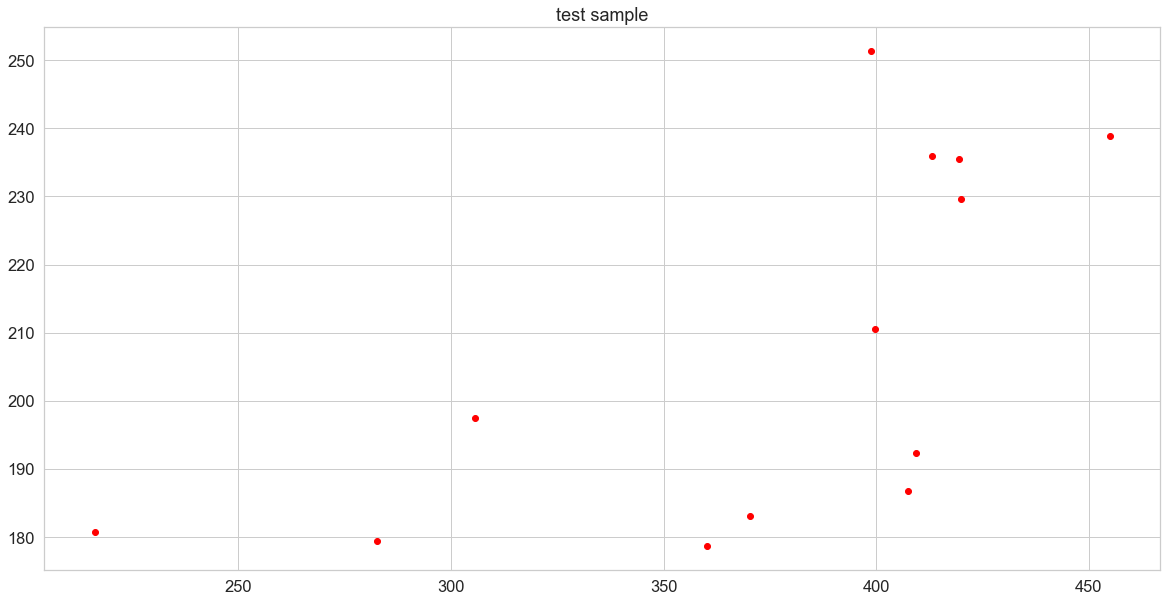

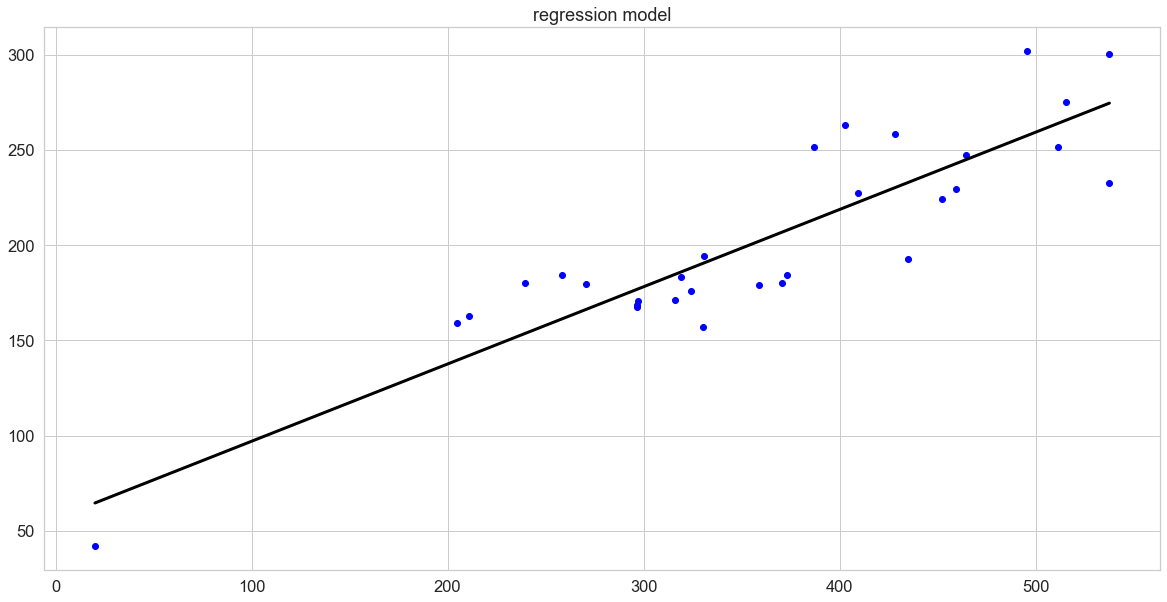

In [11]:
#gas model
#x = ds2['QgStd[m3/d]'].values
#y = ds2['FSF Gas Rate [sm3/d]'].values
#liquid model
x = ds2['Ql[m3/d]'].values
y = ds2['FSF Liquid [sm3/d]'].values

plt.figure(figsize=(20,10))
plt.scatter(x,y,color='blue')
plt.title("all data")
plt.show()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=42)

plt.figure(figsize=(20,10))
plt.scatter(X_train,y_train,color='blue')
plt.title("train sample")
plt.show()

plt.figure(figsize=(20,10))
plt.scatter(X_test,y_test,color='red')
plt.title("test sample")
plt.show()

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
X_train = X_train.reshape(-1,1)

reg.fit(X_train, y_train)


prediction_space = np.linspace(min(x), max(x)).reshape(-1,1)
x1= prediction_space
y1= reg.predict(prediction_space)


plt.figure(figsize=(20,10))
plt.scatter(X_train, y_train, color='blue')
plt.plot(x1, y1,
        color='black', linewidth=3)
plt.title("regression model")
plt.show()



The fit coefficients are a = -0.0001, b = 0.4270 c = 57.3158
            2
-6.105e-05 x + 0.427 x + 57.32


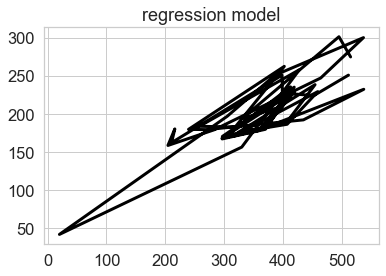

In [43]:
x2=ds2['Ql[m3/d]']
y2=ds2['FSF Liquid [sm3/d]']

fit = np.polyfit(x2 ,y2 , 2)
equation = np.poly1d(fit)
print ("The fit coefficients are a = {0:.4f}, b = {1:.4f} c = {2:.4f}".format(*fit))
print (equation)
plt.plot(x2, y2,
        color='black', linewidth=3)
plt.title("regression model")
plt.show()8
´p'0